# Sentiment Analysis of Amazon Reviews

* Sentiment Analysis of Amazon reviews using the TextBlob NLP package. The reviews have already been filtered and preprocessed using the 'data_prepration.ipynb' notebook. 

* In this notebook we will use the TextBlob NLP utility to generate a polarity score for each review and the summary.
* A polarity score tells how positive or negative a piece of text is. There are however some limitations of this utility, which are discussed later.
* Then we will create a combined score which will be considered as the predicted sentiment of the review.
* Each sentiment is classified as either positive or negative.

In [19]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from textblob import TextBlob
from sklearn.model_selection import train_test_split

In [20]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using TextBlob sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
#     print(text)
    raw_sentences = sent_tokenize(text)
#     print(raw_sentences)
    
    sentence_count = 0
    for sentence in raw_sentences:
        sent_score = 0     
        sentence = str(sentence)
#         print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        blob = TextBlob(sentence)
        sentiment = blob.sentiment
        sentence_score = sentiment.polarity
#         sentiment.polarity, sentiment.subjectivity
        if sentence_score != 0:
            sentence_count += 1

        total_score = total_score + sentence_score
    
    if sentence_count == 0:
        return 0
    
    return (total_score / sentence_count) * 100

In [21]:
reviews = pd.read_csv("data/small_balanced_corpus.csv")

In [22]:
reviews = reviews.sample(frac=1).reset_index(drop=True)
reviews.head()

,overall,asin,reviewText,summary
0,5.0,B001C6GVI6,Arrived fast and safe.,Five Stars
1,1.0,B017L186MY,"Great game if you like fighting weak AI in very limited number of maps.\n\nIf you want to play against other players, be prepared to lose... Bad (rape in game terms is far to gentle for the level of domination you'll experience). Even though the game makes it sound like you'll be up against other players within your skill level, but its total BS.\n\nSo unless you like getting bent over by a bunch of teens or unemployed losers who only team up with other losers to dominate or playing AI in what seems like less then a half-dozen maps with the same 2 objectives... Have fun!",Bored After 1 Day...
2,5.0,B00J00BLRM,"You simply can't go wrong with a HORI screen protector. If you can't correctly apply a HORI, you probably won't be able to apply any screen protectors properly. I can't even tell that there's a screen protector on my Vita, nor can anyone else.",This is the screen protector to get.
3,1.0,B00NE5D4SS,Guaranteed to make your ears bleed.\nSounds okay. Has a mic.\nUncomfortable to wear.,One Star
4,5.0,B0033BJS9C,fine,Five Stars


In [23]:
# Dropping the rows with empty review text
reviews.dropna(subset=['reviewText'], inplace=True)

In [24]:
# We will now pass each review and summary to the get_sentiment_score function and generate a score

reviews['review_text_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))
reviews['summary_score'] = reviews['summary'].apply(lambda text : get_sentiment_score(str(text)))

In [25]:
reviews[['review_text_score', 'summary_score']].describe()

,review_text_score,summary_score
count,3999.000000,3999.000000
mean,9.708639,4.237120
std,33.104074,39.147578
min,-100.000000,-100.000000
25%,-9.191468,0.000000
50%,5.312500,0.000000
75%,26.250000,20.000000
max,100.000000,100.000000


The scores range from -100 to 100. The score is calculated as following - 
* For each sentence in a piece of text (which may contain multiple sentences), we will generate a polarity score using the textBlob utility, and get the total score for all sentences.
* The final score is then calculated by dividing the sum by the number of sentence in the text and multiplying by 100. This will prevent longer texts from having higher scores.

In [26]:
reviews[['reviewText','review_text_score', 'summary', 'summary_score', 'overall']].tail(10)

,reviewText,review_text_score,summary,summary_score,overall
3990,Don't last long,-2.500000,One Star,0.00,1.0
3991,"I actually don't feel quite a silly ""playing"" this plastic guitar because it feels much more real. :) The Pro options are way better and more realistic that we were expecting. We are having a little RB revival now that we have this new guitar.",13.777357,A nice upgrade to the original,48.75,5.0
3992,"I thought The Sims was a cool concept at first, then i realized what a time consuming bunch of nonsense it is. Creating people and having a bit of fun for an hour or so to me is fine, but people are obsessed and sit in front of the computer playing this stupid game for hour upon hour, ignoring there families, friends and even WORK. ITS A GAME. make your real life, not a virtual one. I have nothing against thee game personally if you wanna play and have some fun for a little while, even small bits at a time. I played SIMS 2 and started to get a bit hooked so i said you know what this is worse than any drug, so i gave it up. Plus i just thing the whole thing is pretty lame. Word to the wise, game a bit, live a lot. Or get a life.",-5.942235,People have way to much time on there hands.,20.00,1.0
3993,Was not xbox 360 compatible it was the wrong cord,-50.000000,Wrong cord,-50.00,1.0
3994,What totally torques me off about this purchase is the fine print is not apparent until after I got the item and tried to play the game. I do NOT want to play online multiplayer games at all; I only like to play single shooter games by myself! So to find out only after I open the package that I WASTED my money is very unsetlling! Very disappointed in myself for not doing more research and EVEN MORE disappointed in the game companies only offering these cool games for online play. DOOM on you!,-4.950397,More wasted money!!!,15.00,1.0
3995,I bought this one for a friend but I have a similar model and it's top notch in durability and comfort.,25.000000,Great mouse.,80.00,5.0
3996,"One star. The legendary status of the games themselves is not in doubt, but considering these games are NOT remastered in HD is disappointment. This exact item is offered (as DLC) on the PlaystationStore remastered in HD for ten bucks more. I wish I knew that before purchasing from here.",22.500000,"Not HD version, which is for sale on PSN",0.00,1.0
3997,Fun characters to play on the infinity game.,-5.000000,Good addition,70.00,5.0
3998,"I can't believe this SecuROM s*** is now infecting Rockstar games, or any other games from. I refuse to buy this game or any other PC game until they lose it. I'm advising all my friends and people online to do the same.\n\nI was so ready to buy this game, too. The price doesn't even matter to me, but SecuROM just boosts the power of the piracy communities and screws over people who actually buy the game. It's really ironic. It's like putting 20 different security cameras small Asian store (I'm asian so don't be offended); makes you feel like you're thief by just 'entering' the store.\n\nUntil someone smart enough comes along to create the alternative for the Securom, I won't be buying PC games with Securom at all.",-6.981293,I bought the console version instead.,0.00,1.0
3999,Return/didn't work,0.000000,One Star,0.00,1.0


We can see from the above scores, that positive reviews indeed have a better score in 'review_text_score' and 'summary_score', and the negative reviews for bad scores respectively. There are however a few exceptions, consider the review 'People have way to much time on there hands.' which does not have any negative word hence has a good summary score, but has a hidden meaning which gives negative meaning. Such reviews are misclassified.

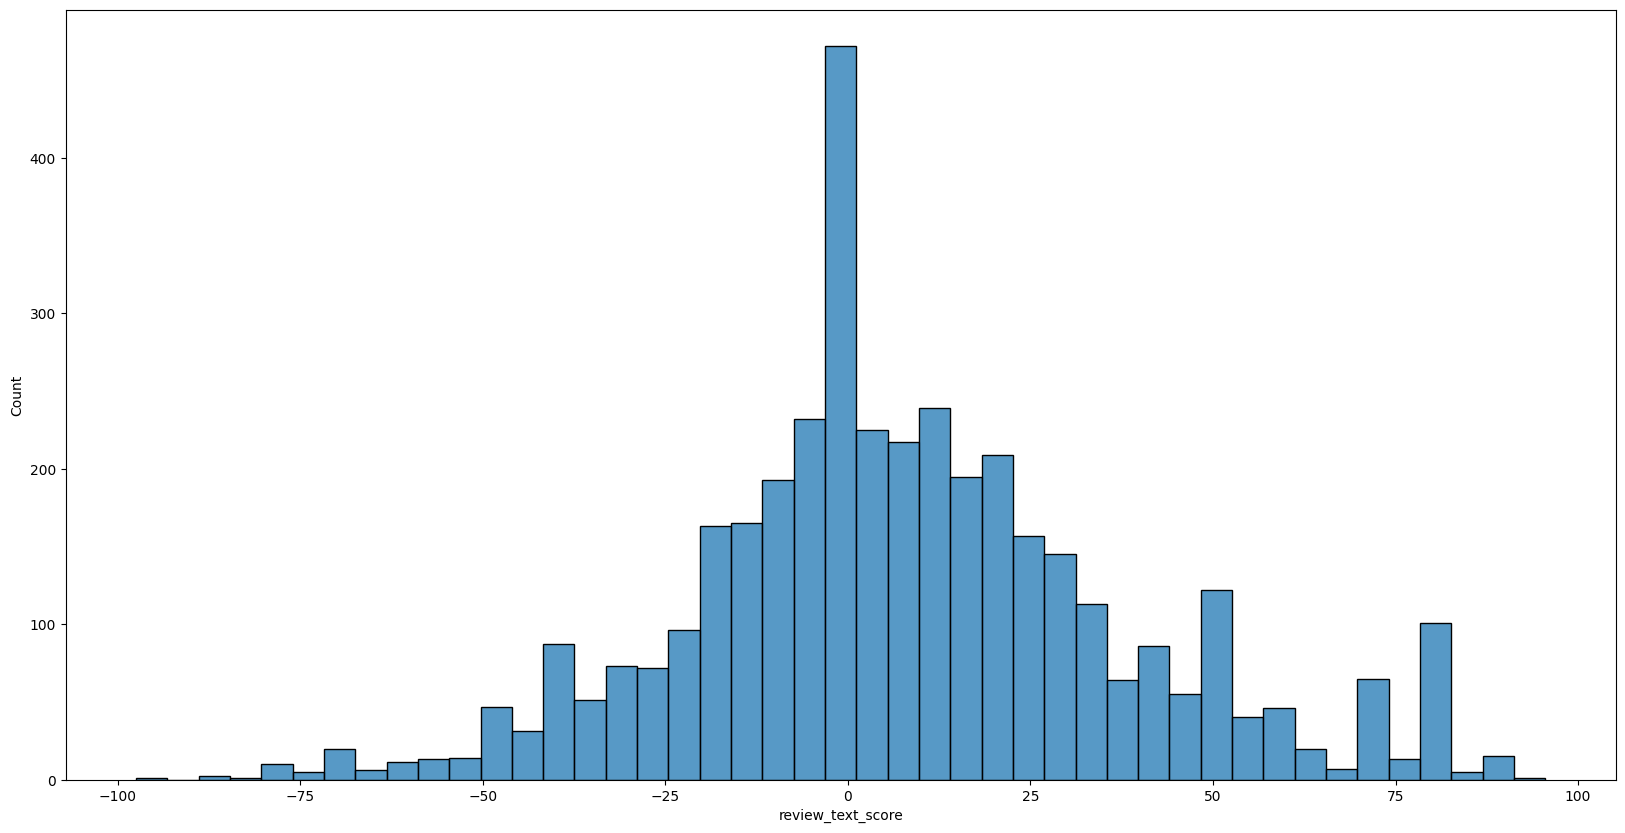

In [27]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='review_text_score', data=reviews.query("review_text_score < 100 and review_text_score > -100"), ax=ax)

plt.show()

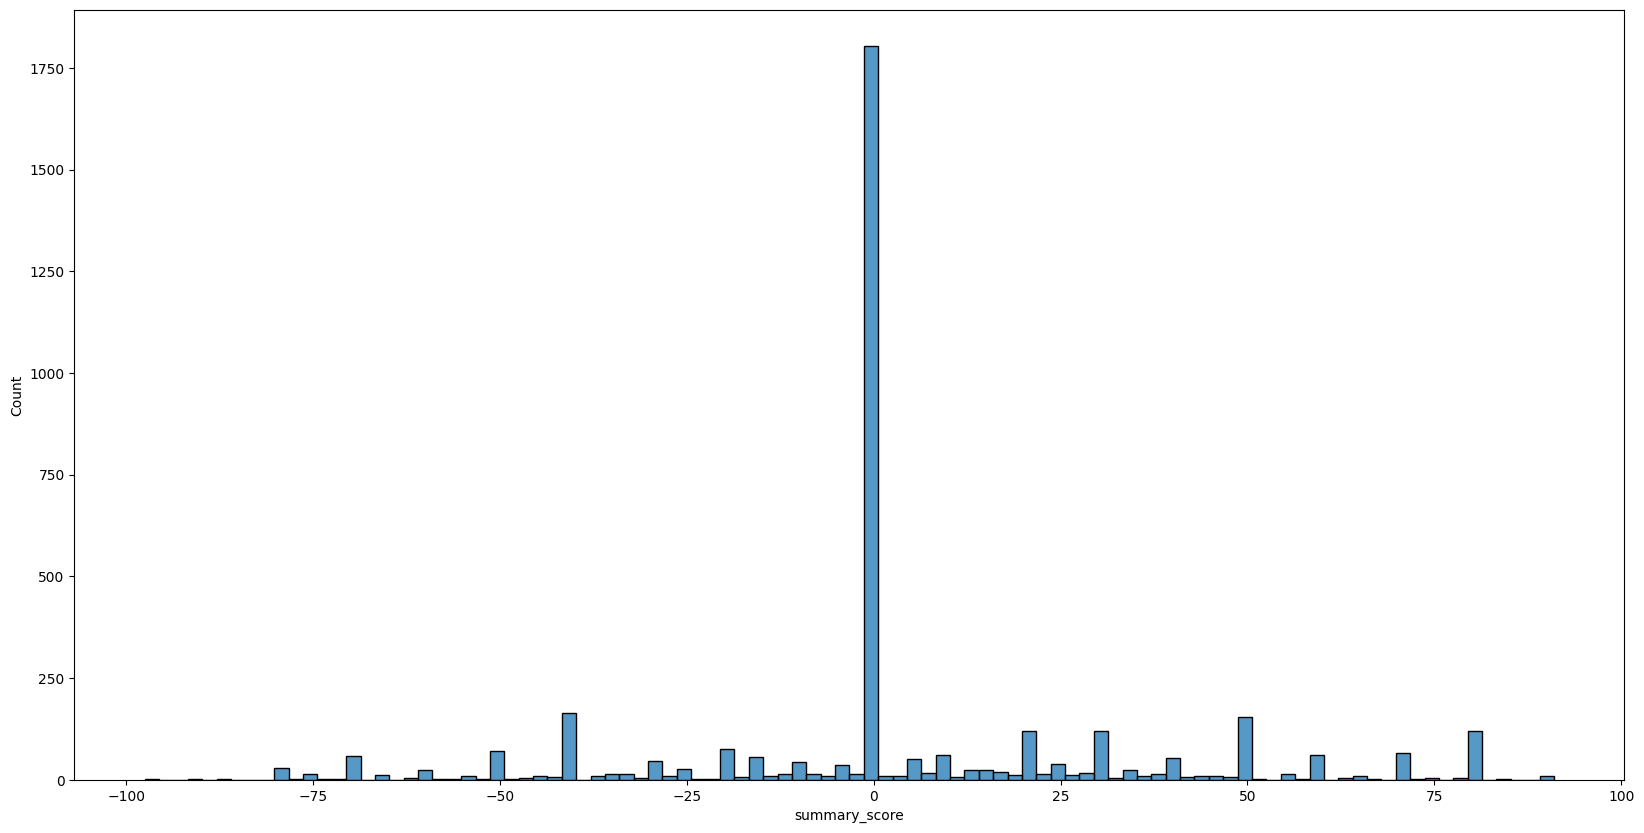

In [28]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='summary_score', data=reviews.query("summary_score < 100 and summary_score > -100"), ax=ax)

plt.show()

In [31]:
# We will take the average of the two scores we calculated, and call it sentiment_score, this will be our predicted sentiment.
reviews['sentiment_score'] = (reviews['review_text_score'] + reviews['summary_score'])/2

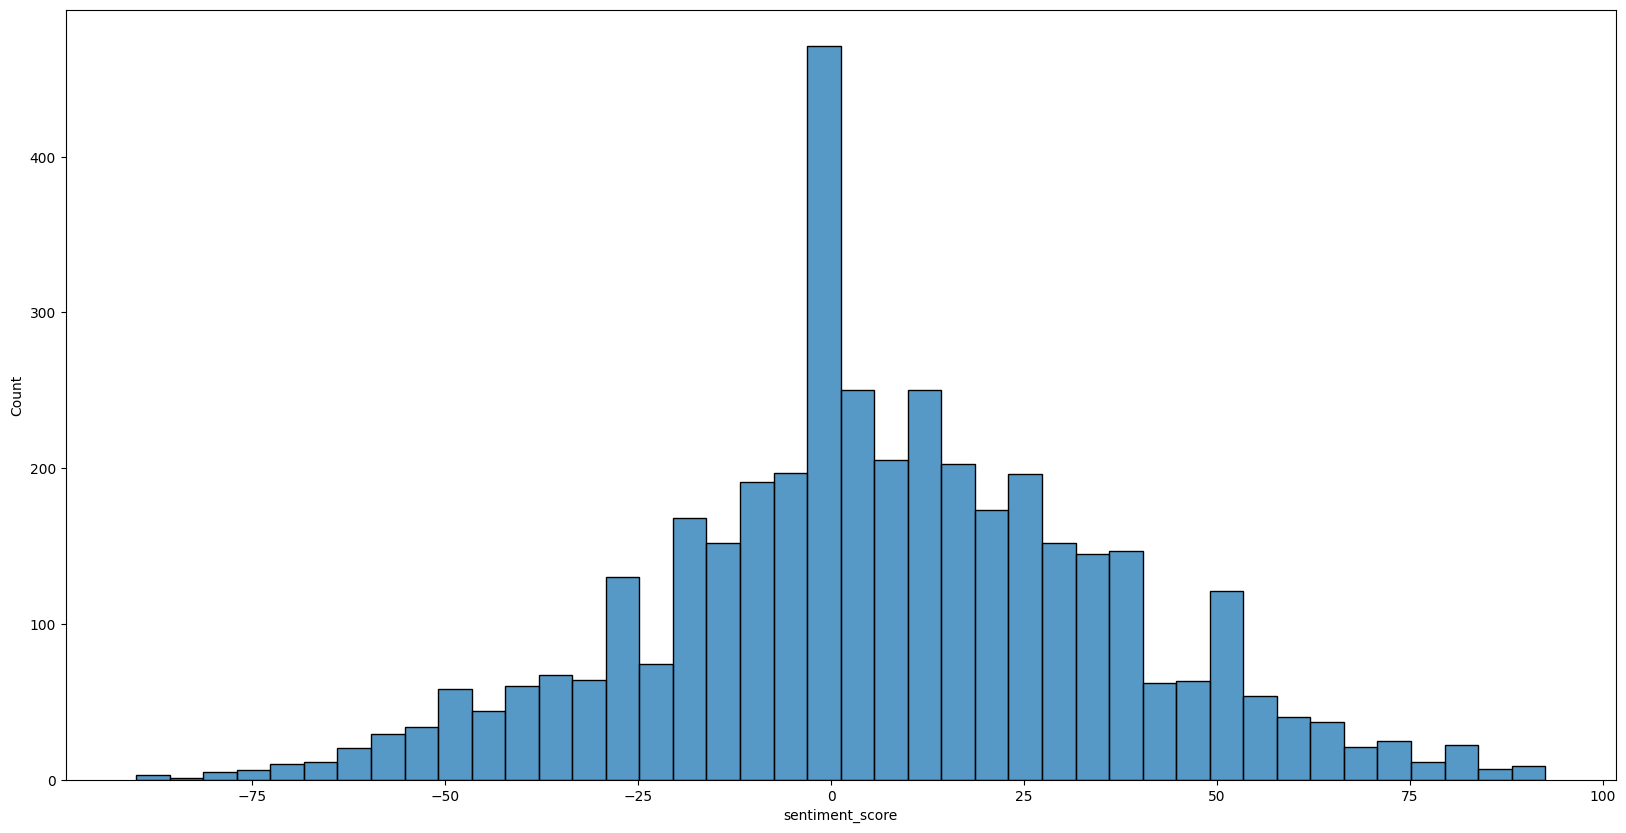

In [32]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='sentiment_score', data=reviews.query("sentiment_score < 100 and sentiment_score > -100"), ax=ax)

plt.show()

In [36]:
# We are predicting the sentiment as either positive or negative, we may however add neutral as well by adding
# the reviews with rating 3 in data_prepartion.ipynb notebook.

reviews['pred_sentiment'] = reviews['sentiment_score'].apply(lambda x: "positive" if x>0 else "negative")
# X_train['pred_sentiment'].value_counts(dropna=False)


<Axes: xlabel='overall', ylabel='count'>

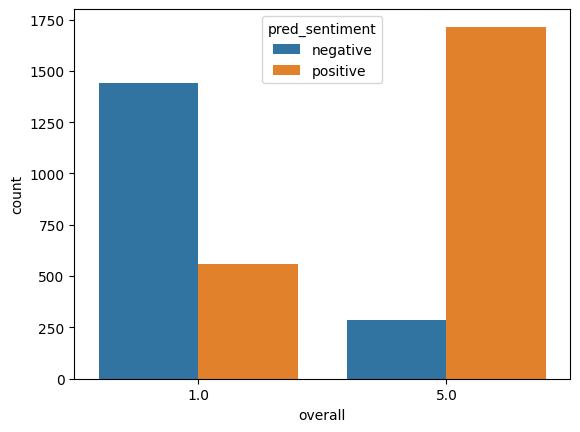

In [37]:
sns.countplot(x='overall', hue='pred_sentiment' ,data = reviews)

Fom the above plot, we can get an idea of how many reviews have been correctly classified as postive and negative.

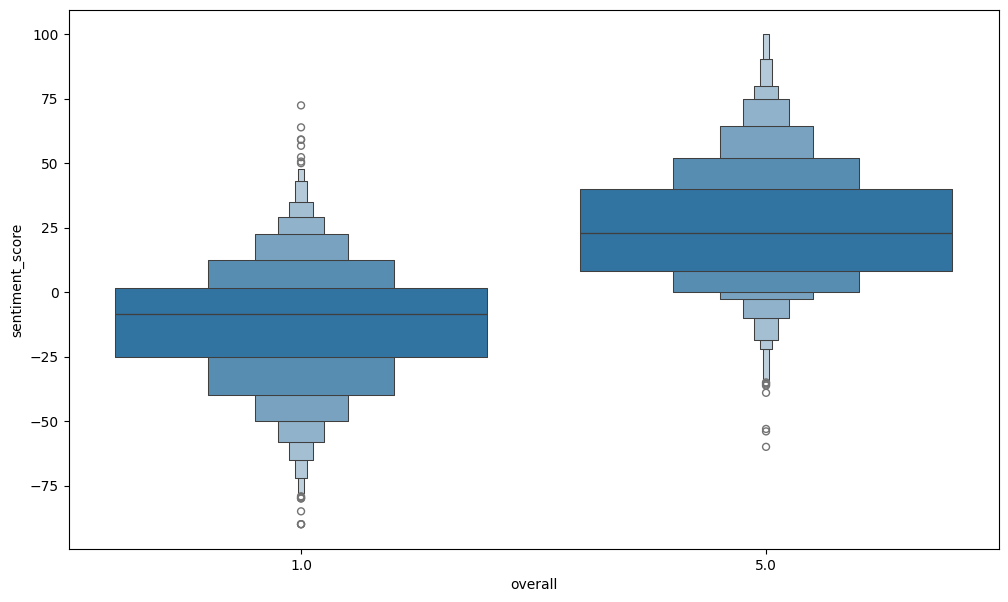

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='sentiment_score', data = reviews, ax=ax)
plt.show()

From above plot, we can observe that the reviews with rating `1` have lesser scores in general with majority scores lying between -25 to 0. And for the reviews with rating `5`, the scores are between 10-50 approx. Very less reviews with rating 5 have scores less than 0.

In [43]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=5 else "negative")

In [44]:
y_pred, y_true = reviews['pred_sentiment'].tolist(), reviews['true_sentiment'].tolist()


In [45]:
reviews['true_sentiment'].value_counts()

true_sentiment
negative    2000
positive    1999
Name: count, dtype: int64

In [49]:
# To get a better idea about the predictions, let's create a confustion matrix.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)


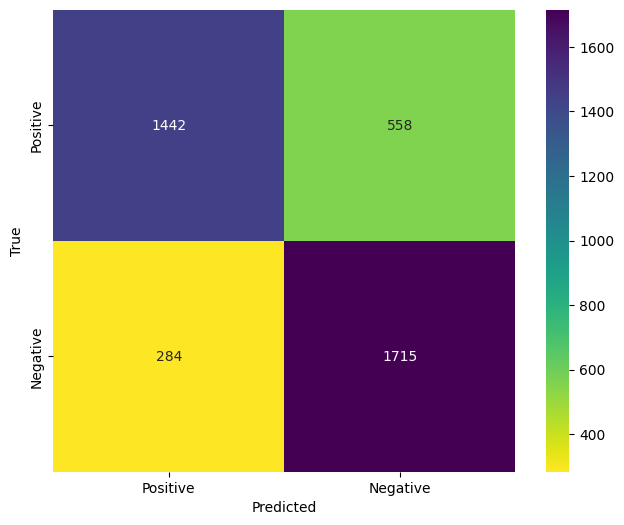

In [51]:
labels = ['Positive', 'Negative']
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax,  xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');


We can notice that there are a lot of false negatives, meaning positive reviews predicted as negative. We may need further preprocessing to get better predictions.

In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Accuracy:{}\nPrecision: {}\nRecall: {}\nf1 score: {}".format(accuracy_score(y_true, y_pred), precision_score(y_true, y_pred, average = 'weighted'), recall_score(y_true, y_pred, average = 'weighted'), f1_score(y_true, y_pred, average = 'weighted')))

Accuracy:0.7894473618404602
Precision: 0.7949937033325191
Recall: 0.7894473618404602
f1 score: 0.7884578982849653
